In [2]:
import h5py
import numpy as np

def load_labels_sessions(file_path):
    with h5py.File(file_path, "r") as f:
        # After inspecting keys, load datasets
        labels = f['labels'][:]
        device = f['hardwares'][:]
        sessions = f['sessions'][:]
        
    return labels, device, sessions

# Load all splits
train_labels,train_device, train_sessions = load_labels_sessions("../Data/train_raw.h5")
test_labels, test_device, test_sessions = load_labels_sessions("../Data/test_raw.h5")
valid_labels,valid_device, valid_sessions = load_labels_sessions("../Data/valid_raw.h5")
neg_labels,neg_device, neg_sessions = load_labels_sessions("../Data/neg_raw.h5")

# Concatenate all data
all_device= np.concatenate([train_device, test_device, valid_device, neg_device])
all_labels = np.concatenate([train_labels, test_labels, valid_labels, neg_labels])
all_sessions = np.concatenate([train_sessions, test_sessions, valid_sessions, neg_sessions])

# Find all unique subjects
all_unique_subjects = np.unique(all_labels)

# Map: subject -> set of sessions
subject_sessions = {}
for label, session in zip(all_labels, all_sessions):
    if label not in subject_sessions:
        subject_sessions[label] = set()
    subject_sessions[label].add(session)

# Number of unique sessions per subject
num_sessions_per_subject = np.array([len(sessions) for sessions in subject_sessions.values()])

# Average and Standard Deviation
avg_sessions = np.mean(num_sessions_per_subject)
std_sessions = np.std(num_sessions_per_subject)

print(f"Number of unique subjects: {len(all_unique_subjects)}")
print(f"Average number of sessions per subject: {avg_sessions:.2f}")
print(f"Standard deviation of sessions per subject: {std_sessions:.2f}")









Number of unique subjects: 345
Average number of sessions per subject: 17.41
Standard deviation of sessions per subject: 10.48


In [6]:
import h5py
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from io import StringIO

def load_labels_sessions_devices(path):
    with h5py.File(path, 'r') as f:
        labels   = f['labels'][:]
        sessions = f['sessions'][:]
        devices  = f['hardwares'][:]
    return labels, sessions, devices

# 1. Load and concatenate
splits = ['train_raw.h5','test_raw.h5','valid_raw.h5','neg_raw.h5']
all_labels, all_sessions, all_devices = [], [], []
for fn in splits:
    L, S, D = load_labels_sessions_devices(f"../Data/{fn}")
    all_labels.append(L)
    all_sessions.append(S)
    all_devices.append(D)

all_labels   = np.concatenate(all_labels)
all_sessions = np.concatenate(all_sessions)
all_devices  = np.concatenate(all_devices)

# 2. Subject count
unique_subjects = np.unique(all_labels)
num_subjects    = unique_subjects.size

# 3. Session counts
# 3a. per-subject sets for avg ± SD
sess_per_subj = {s: set() for s in unique_subjects}
for lbl, sess in zip(all_labels, all_sessions):
    sess_per_subj[lbl].add(sess)
counts = np.array([len(s) for s in sess_per_subj.values()])
avg_sess, std_sess = counts.mean(), counts.std()
num_sessions = counts.sum()

# 4. Device count
num_devices = np.unique(all_devices).size


# Convert the input data into a pandas DataFrame
df = pd.read_csv(StringIO(input_data), sep="\t")

# Extract the numeric part of participant_id and convert to integers
df['participant_num'] = df['participant_id'].str.extract(r'(\d+)$').astype(int)

# Filter rows based on all_unique_subjects
filtered_df = df[df['participant_num'].isin(all_unique_subjects)]

# Compute statistics for the filtered DataFrame
sex_counts = filtered_df['sex'].value_counts(dropna=False)
avg_age = filtered_df['age'].mean()
std_age = filtered_df['age'].std()
sex_count = filtered_df['sex'].value_counts()
unspecified = filtered_df['sex'].isna().sum()

# Output results
print(f"Filtered Data:\n{filtered_df}\n")
#print(f"Average Age: {average_age:.2f}")
#print(f"Standard Deviation of Age: {std_age:.2f}")
print("Count of Sex:")
print(sex_count)



# Compute max and min age from the filtered DataFrame
max_age = filtered_df['age'].max()
min_age = filtered_df['age'].min()

results = {
    'Metric': [
        'Unique subjects',
        'Unique sessions',
        'Average sessions per subject (± SD)',
        'Female',
        'Male',
        'Unspecified sex',
        'Age, years (mean ± SD)',
        'Age, years (range)'
    ],
    'Value': [
        f"{num_subjects}",
        f"{num_sessions}",
        f"{avg_sess:.2f} $\\pm$ {std_sess:.2f}",
        f"{sex_counts.get('F', 0)} ({sex_counts.get('F',0)/num_subjects*100:.1f}\\%)",
        f"{sex_counts.get('M', 0)} ({sex_counts.get('M',0)/num_subjects*100:.1f}\\%)",
        f"{unspecified} ({unspecified/num_subjects*100:.1f}\\%)",
        f"{avg_age:.1f} $\\pm$ {std_age:.1f}",
        f"{min_age}--{max_age}"
    ]
}
df_res = pd.DataFrame(results)

# 5. Output LaTeX
latex_table = df_res.to_latex(
    index=False,
    caption='Demographic and session distribution of the dataset (N = %d subjects).' % num_subjects,
    label='tab:dataset_summary',
    column_format='ll',
    escape=False  # to allow $\\pm$ and % signs
)

print("================ \n")
print(latex_table)

Filtered Data:
    participant_id   age sex hand  participant_num
0       sub-LTP063  25.0   F    R               63
1       sub-LTP064  27.0   M    R               64
2       sub-LTP065  19.0   M    R               65
3       sub-LTP066  19.0   F    R               66
4       sub-LTP067  22.0   M    R               67
..             ...   ...  ..  ...              ...
358     sub-LTP435  25.0   F    R              435
359     sub-LTP436  18.0   M    R              436
360     sub-LTP437  19.0   F    R              437
361     sub-LTP438  19.0   F    R              438
362     sub-LTP439  19.0   F    R              439

[345 rows x 5 columns]

Count of Sex:
sex
F    161
M    136
Name: count, dtype: int64

\begin{table}
\caption{Demographic and session distribution of the dataset (N = 345 subjects).}
\label{tab:dataset_summary}
\begin{tabular}{ll}
\toprule
Metric & Value \\
\midrule
Unique subjects & 345 \\
Unique sessions & 6007 \\
Average sessions per subject (± SD) & 17.41 $\pm$ 10.4

In [7]:
num_sessions

6007

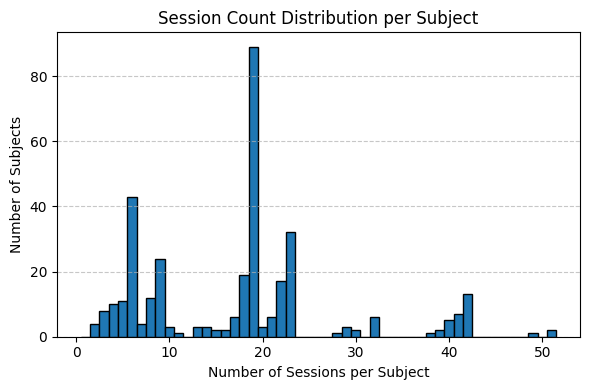

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Use the counts array already computed in the user's script
# This represents number of unique sessions per subject
# (as lengths of the sets in sess_per_subj)

# Plot histogram of session counts per subject
plt.figure(figsize=(6, 4))
plt.hist(counts, bins=range(1, counts.max() + 2), edgecolor='black', align='left')
plt.xlabel('Number of Sessions per Subject')
plt.ylabel('Number of Subjects')
plt.title('Session Count Distribution per Subject')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

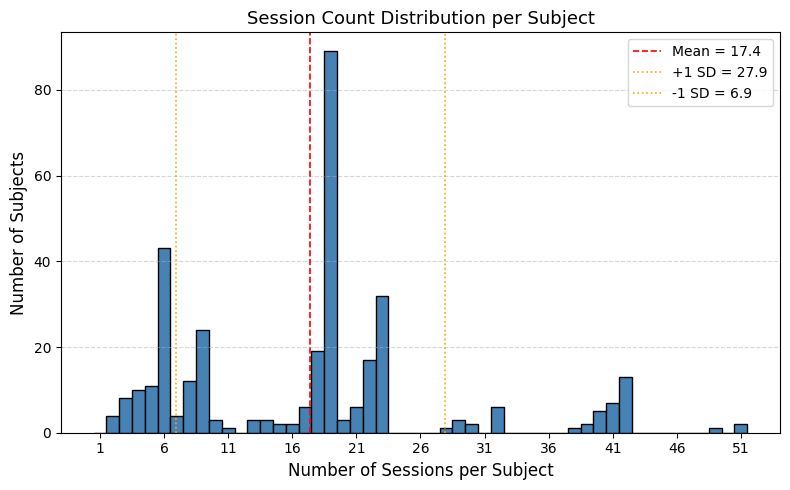

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))
plt.hist(
    counts, 
    bins=range(1, counts.max() + 2), 
    edgecolor='black', 
    align='left', 
    color='steelblue'
)

plt.xticks(ticks=range(1, counts.max() + 1, 5))

plt.xlabel('Number of Sessions per Subject', fontsize=12)
plt.ylabel('Number of Subjects', fontsize=12)
plt.title('Session Count Distribution per Subject', fontsize=13)

# Add mean and std lines
mean_val = counts.mean()
std_val = counts.std()
plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.2, label=f'Mean = {mean_val:.1f}')
plt.axvline(mean_val + std_val, color='orange', linestyle=':', linewidth=1.2, label=f'+1 SD = {mean_val + std_val:.1f}')
plt.axvline(mean_val - std_val, color='orange', linestyle=':', linewidth=1.2, label=f'-1 SD = {mean_val - std_val:.1f}')

# Optional: Use log scale for y-axis if there's a long tail
# plt.yscale('log')

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

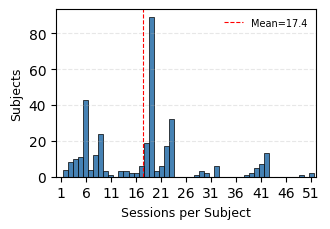

In [23]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(3.4, 2.4))  # ~3.4 inches width for column fit

ax.hist(
    counts,
    bins=range(1, counts.max() + 2),
    edgecolor='black',
    align='left',
    color='steelblue',
    linewidth=0.5
)

# Compact x-axis ticks: every 5th
ax.set_xticks(np.arange(1, counts.max() + 1, 5))
ax.set_xlim(left=0, right=counts.max() + 1)

# Axis labels with smaller font
ax.set_xlabel('Sessions per Subject', fontsize=9)
ax.set_ylabel('Subjects', fontsize=9)

# Mean and std lines
mean_val = counts.mean()
std_val = counts.std()
ax.axvline(mean_val, color='red', linestyle='--', linewidth=0.8, label=f'Mean={mean_val:.1f}')
#ax.axvline(mean_val + std_val, color='green', linestyle=':', linewidth=0.8, label=f'+1 SD')
#ax.axvline(mean_val - std_val, color='green', linestyle=':', linewidth=0.8, label=f'-1 SD')

# Legend without box
ax.legend(fontsize=7, frameon=False, loc='upper right')

# Grid only on y-axis
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Tighter layout
fig.tight_layout()
plt.savefig("session_distribution.pdf", format='pdf', bbox_inches='tight')
plt.show()


In [16]:
# 1. Find the maximum session count
max_count = counts.max()  # should be 51

# 2. Find which subject(s) have that count
subjects_max = [subj for subj, sess_set in sess_per_subj.items()
                if len(sess_set) == max_count]
print(f"Subject(s) with {max_count} sessions: {subjects_max}")

# 3. List their actual session IDs
for subj in subjects_max:
    print(f"\nSubject {subj} session IDs ({max_count} total):")
    print(sorted(sess_per_subj[subj]))

Subject(s) with 51 sessions: [229, 246]

Subject 229 session IDs (51 total):
[1, 4, 8, 13, 15, 18, 22, 27, 29, 36, 39, 46, 48, 53, 62, 64, 69, 74, 76, 603, 610, 615, 617, 620, 622, 624, 627, 629, 631, 636, 638, 643, 644, 650, 652, 655, 659, 664, 666, 669, 671, 676, 2182, 2189, 2191, 2205, 2210, 2212, 2219, 2226, 2232]

Subject 246 session IDs (51 total):
[1, 8, 14, 15, 21, 22, 28, 29, 35, 36, 42, 43, 49, 50, 56, 57, 64, 70, 72, 631, 632, 636, 638, 639, 643, 645, 646, 650, 652, 653, 657, 659, 660, 666, 667, 671, 673, 674, 678, 687, 688, 692, 2065, 2072, 2074, 2079, 2086, 2088, 2093, 2095, 2096]


In [8]:
# Compute the set of all_unique_subjects and the participant numbers in the input
all_unique_subjects_set = set(all_unique_subjects)
input_subjects_set = set(df['participant_num'])

# Find subjects in all_unique_subjects but not in the input
missing_subjects = all_unique_subjects_set - input_subjects_set

# Output the missing subjects
print(f"Subjects in all_unique_subjects but not present in the input: {sorted(missing_subjects)}")


Subjects in all_unique_subjects but not present in the input: []


In [9]:
len(all_unique_subjects_set), len(input_subjects_set)

(345, 364)

In [4]:
# Input data as a string
input_data = """
participant_id	age	sex	hand
sub-LTP063	25	F	R
sub-LTP064	27	M	R
sub-LTP065	19	M	R
sub-LTP066	19	F	R
sub-LTP067	22	M	R
sub-LTP068	20	M	R
sub-LTP069	19	F	R
sub-LTP070	29	F	R
sub-LTP073	21	M	R
sub-LTP074	19	M	R
sub-LTP075	25	M	R
sub-LTP076	23	M	R
sub-LTP077	20	M	L
sub-LTP078	18	M	R
sub-LTP079	20	M	R
sub-LTP080	21	F	R
sub-LTP081	20	F	R
sub-LTP082	18	F	R
sub-LTP083	19	F	R
sub-LTP084	21	M	R
sub-LTP085	22	F	R
sub-LTP086	20	M	R
sub-LTP087	19	F	R
sub-LTP088	20	F	R
sub-LTP089	23	M	R
sub-LTP090	19	F	R
sub-LTP091	18	M	R
sub-LTP092	18	F	R
sub-LTP093	n/a	n/a	n/a
sub-LTP094	22	F	R
sub-LTP095	21	F	R
sub-LTP096	21	M	R
sub-LTP097	19	M	R
sub-LTP098	19	F	R
sub-LTP099	19	F	R
sub-LTP100	22	F	R
sub-LTP101	19	n/a	R
sub-LTP102	19	F	R
sub-LTP103	20	M	R
sub-LTP104	26	F	R
sub-LTP105	21	M	R
sub-LTP106	n/a	n/a	n/a
sub-LTP107	22	M	A
sub-LTP108	23	F	R
sub-LTP109	18	M	R
sub-LTP110	19	F	R
sub-LTP111	25	F	R
sub-LTP112	21	M	R
sub-LTP113	20	F	R
sub-LTP114	19	M	R
sub-LTP115	n/a	n/a	n/a
sub-LTP116	20	F	R
sub-LTP117	n/a	n/a	n/a
sub-LTP118	18	M	R
sub-LTP119	20	F	R
sub-LTP120	21	M	R
sub-LTP121	20	F	R
sub-LTP122	n/a	n/a	n/a
sub-LTP123	n/a	n/a	n/a
sub-LTP124	20	F	R
sub-LTP125	19	M	R
sub-LTP126	18	F	R
sub-LTP127	19	M	R
sub-LTP128	26	M	R
sub-LTP129	19	M	R
sub-LTP130	24	M	R
sub-LTP131	24	F	R
sub-LTP132	24	F	R
sub-LTP133	n/a	n/a	n/a
sub-LTP134	19	F	R
sub-LTP135	20	F	R
sub-LTP136	23	F	R
sub-LTP137	20	F	R
sub-LTP138	29	F	R
sub-LTP139	27	M	R
sub-LTP140	26	F	R
sub-LTP141	20	F	R
sub-LTP142	23	F	R
sub-LTP143	24	F	R
sub-LTP144	20	M	R
sub-LTP145	26	F	R
sub-LTP146	26	M	R
sub-LTP147	28	F	R
sub-LTP148	26	F	R
sub-LTP149	22	F	R
sub-LTP150	24	M	R
sub-LTP151	25	F	R
sub-LTP152	60	M	R
sub-LTP153	25	F	R
sub-LTP154	62	F	R
sub-LTP155	20	M	R
sub-LTP156	61	M	R
sub-LTP158	18	F	R
sub-LTP159	21	M	R
sub-LTP160	69	F	R
sub-LTP161	19	F	R
sub-LTP162	62	F	R
sub-LTP163	77	F	R
sub-LTP164	81	F	R
sub-LTP165	64	F	R
sub-LTP166	22	M	R
sub-LTP167	21	F	R
sub-LTP168	20	M	R
sub-LTP169	78	F	R
sub-LTP170	65	F	R
sub-LTP172	19	M	R
sub-LTP173	85	F	R
sub-LTP174	21	F	R
sub-LTP175	68	M	R
sub-LTP176	73	F	R
sub-LTP177	75	M	R
sub-LTP178	70	F	R
sub-LTP179	62	F	R
sub-LTP180	70	M	R
sub-LTP181	64	M	R
sub-LTP182	79	M	R
sub-LTP183	68	F	R
sub-LTP184	20	F	R
sub-LTP185	18	F	R
sub-LTP186	20	F	R
sub-LTP187	19	M	R
sub-LTP188	20	F	R
sub-LTP189	18	M	R
sub-LTP190	19	M	R
sub-LTP191	20	F	R
sub-LTP192	22	F	R
sub-LTP193	24	M	R
sub-LTP194	25	M	R
sub-LTP195	24	F	R
sub-LTP196	24	F	R
sub-LTP197	24	F	R
sub-LTP198	23	F	R
sub-LTP199	22	F	R
sub-LTP200	23	F	R
sub-LTP201	23	M	R
sub-LTP202	20	M	R
sub-LTP203	68	F	R
sub-LTP204	62	M	R
sub-LTP205	61	F	R
sub-LTP206	63	M	R
sub-LTP207	n/a	n/a	n/a
sub-LTP208	68	F	R
sub-LTP209	24	F	R
sub-LTP210	26	F	R
sub-LTP211	25	F	R
sub-LTP212	27	M	R
sub-LTP213	66	M	R
sub-LTP214	21	M	R
sub-LTP215	26	F	R
sub-LTP216	66	F	R
sub-LTP217	62	M	R
sub-LTP218	68	M	R
sub-LTP219	71	M	R
sub-LTP220	79	F	R
sub-LTP221	74	F	R
sub-LTP222	63	F	R
sub-LTP223	78	F	R
sub-LTP224	86	F	R
sub-LTP225	75	F	R
sub-LTP226	66	F	R
sub-LTP227	24	M	R
sub-LTP228	25	M	R
sub-LTP229	n/a	n/a	n/a
sub-LTP230	21	M	R
sub-LTP231	18	F	R
sub-LTP232	20	M	R
sub-LTP233	21	M	R
sub-LTP234	21	M	R
sub-LTP235	28	F	R
sub-LTP236	n/a	n/a	n/a
sub-LTP237	18	M	R
sub-LTP238	19	M	R
sub-LTP239	18	M	R
sub-LTP240	21	F	R
sub-LTP241	21	M	L
sub-LTP242	n/a	n/a	n/a
sub-LTP243	24	M	R
sub-LTP244	19	M	L
sub-LTP245	20	M	R
sub-LTP246	n/a	n/a	n/a
sub-LTP247	25	M	R
sub-LTP248	25	M	R
sub-LTP249	n/a	n/a	n/a
sub-LTP250	n/a	n/a	n/a
sub-LTP251	19	M	R
sub-LTP252	29	F	R
sub-LTP253	23	M	R
sub-LTP254	24	F	R
sub-LTP255	23	F	R
sub-LTP256	27	M	R
sub-LTP257	69	M	R
sub-LTP258	n/a	n/a	n/a
sub-LTP259	n/a	n/a	n/a
sub-LTP260	n/a	n/a	n/a
sub-LTP261	20	F	R
sub-LTP262	71	M	R
sub-LTP263	27	F	R
sub-LTP264	20	M	R
sub-LTP265	30	F	R
sub-LTP266	64	M	R
sub-LTP267	20	F	R
sub-LTP268	21	M	R
sub-LTP269	n/a	n/a	n/a
sub-LTP270	21	n/a	R
sub-LTP271	22	F	R
sub-LTP272	25	F	R
sub-LTP273	n/a	n/a	n/a
sub-LTP274	21	M	R
sub-LTP275	27	F	R
sub-LTP276	18	M	R
sub-LTP277	19	M	R
sub-LTP278	19	M	R
sub-LTP279	n/a	n/a	n/a
sub-LTP280	20	M	R
sub-LTP281	24	F	R
sub-LTP282	26	F	R
sub-LTP283	n/a	n/a	n/a
sub-LTP284	20	F	R
sub-LTP285	n/a	n/a	n/a
sub-LTP286	27	F	R
sub-LTP287	n/a	n/a	n/a
sub-LTP288	19	F	R
sub-LTP289	21	F	R
sub-LTP290	22	F	R
sub-LTP291	26	M	R
sub-LTP292	25	M	R
sub-LTP293	n/a	n/a	n/a
sub-LTP294	21	M	L
sub-LTP295	n/a	n/a	n/a
sub-LTP296	22	M	R
sub-LTP297	n/a	n/a	n/a
sub-LTP298	22	F	R
sub-LTP299	27	M	R
sub-LTP300	19	M	R
sub-LTP301	24	M	R
sub-LTP302	21	M	R
sub-LTP303	17	M	R
sub-LTP304	28	F	R
sub-LTP305	24	F	R
sub-LTP306	20	F	R
sub-LTP307	22	F	R
sub-LTP308	19	F	R
sub-LTP309	20	F	R
sub-LTP310	21	n/a	R
sub-LTP311	19	M	R
sub-LTP312	n/a	n/a	n/a
sub-LTP313	18	F	R
sub-LTP314	20	M	R
sub-LTP315	19	F	R
sub-LTP316	19	n/a	R
sub-LTP317	23	M	R
sub-LTP318	19	F	R
sub-LTP319	21	n/a	R
sub-LTP320	22	n/a	R
sub-LTP321	n/a	n/a	n/a
sub-LTP322	26	M	R
sub-LTP323	18	F	R
sub-LTP324	20	n/a	R
sub-LTP325	20	n/a	R
sub-LTP326	23	F	R
sub-LTP327	18	M	R
sub-LTP328	18	F	R
sub-LTP329	n/a	n/a	n/a
sub-LTP330	24	F	R
sub-LTP331	n/a	n/a	n/a
sub-LTP332	22	M	R
sub-LTP333	23	M	R
sub-LTP334	18	F	R
sub-LTP335	19	F	R
sub-LTP336	18	F	R
sub-LTP337	18	F	R
sub-LTP338	18	F	R
sub-LTP339	18	F	R
sub-LTP340	22	F	R
sub-LTP341	19	F	R
sub-LTP342	n/a	n/a	n/a
sub-LTP343	18	M	R
sub-LTP344	21	M	R
sub-LTP346	18	M	R
sub-LTP347	19	M	R
sub-LTP348	21	F	R
sub-LTP349	18	M	R
sub-LTP352	19	F	R
sub-LTP353	19	M	R
sub-LTP354	n/a	n/a	n/a
sub-LTP355	20	F	R
sub-LTP356	n/a	n/a	n/a
sub-LTP357	n/a	n/a	n/a
sub-LTP358	18	F	R
sub-LTP359	23	F	R
sub-LTP360	19	n/a	R
sub-LTP361	n/a	n/a	n/a
sub-LTP362	18	M	R
sub-LTP363	24	F	R
sub-LTP364	20	F	R
sub-LTP365	20	M	R
sub-LTP366	19	M	R
sub-LTP367	22	F	R
sub-LTP368	19	M	R
sub-LTP369	18	M	R
sub-LTP370	19	F	R
sub-LTP371	19	F	R
sub-LTP372	18	F	R
sub-LTP373	24	M	R
sub-LTP374	18	M	R
sub-LTP375	18	F	R
sub-LTP376	19	F	R
sub-LTP377	20	M	R
sub-LTP378	26	F	R
sub-LTP379	28	M	R
sub-LTP381	25	M	R
sub-LTP382	22	M	R
sub-LTP383	20	F	R
sub-LTP384	25	F	R
sub-LTP385	23	M	R
sub-LTP386	20	F	R
sub-LTP387	20	F	R
sub-LTP388	19	F	R
sub-LTP389	27	M	R
sub-LTP390	19	M	R
sub-LTP391	21	F	R
sub-LTP392	19	n/a	R
sub-LTP393	19	M	R
sub-LTP400	20	M	R
sub-LTP401	21	M	R
sub-LTP402	20	M	R
sub-LTP403	19	M	R
sub-LTP404	19	F	R
sub-LTP405	20	M	R
sub-LTP406	22	M	L
sub-LTP407	25	F	R
sub-LTP408	19	M	L
sub-LTP409	23	F	R
sub-LTP410	19	M	R
sub-LTP411	21	F	A
sub-LTP412	18	F	R
sub-LTP413	18	n/a	R
sub-LTP414	21	n/a	R
sub-LTP415	29	F	R
sub-LTP416	19	F	R
sub-LTP417	27	F	R
sub-LTP418	22	M	R
sub-LTP419	19	M	R
sub-LTP420	19	M	R
sub-LTP421	19	F	R
sub-LTP422	18	M	R
sub-LTP423	20	M	R
sub-LTP424	18	F	R
sub-LTP425	19	F	R
sub-LTP426	18	F	R
sub-LTP427	18	F	R
sub-LTP428	18	F	R
sub-LTP429	19	n/a	R
sub-LTP430	18	F	R
sub-LTP431	18	F	L
sub-LTP432	18	M	R
sub-LTP433	19	n/a	R
sub-LTP434	19	M	R
sub-LTP435	25	F	R
sub-LTP436	18	M	R
sub-LTP437	19	F	R
sub-LTP438	19	F	R
sub-LTP439	19	F	R
sub-LTP440	21	M	R
"""

In [2]:
# Initialize the output dictionary
subject_dict = {}

# Split the input data into lines and remove any extra whitespace
lines = input_data.strip().splitlines()

# The first line is the header; split it to get column names
header = lines[0].split('\t')

# Iterate over each remaining line (each subject)
for line in lines[1:]:
    fields = line.split('\t')
    if len(fields) < 4:
        continue  # Skip incomplete rows if any

    # Extract the participant id, e.g. "sub-LTP063"
    participant = fields[0]

    # --- Change 1 ---
    # Remove the prefix "sub-LTP" to obtain the numeric part (e.g. "063")
    subj_id_str = participant.replace("sub-LTP", "")
    
    # --- Change 2 ---
    # Convert the extracted string to an integer to use as the dictionary key
    try:
        subj_id = int(subj_id_str)
    except ValueError:
        subj_id = subj_id_str  # In case conversion fails (e.g., for non-numeric entries)

    # Prepare the attribute dictionary for the subject
    attributes = {
        'age': fields[1],
        'sex': fields[2],
        'hand': fields[3]
    }

    # Add to the main dictionary with the subject id as key
    subject_dict[subj_id] = attributes




{63: {'age': '25', 'sex': 'F', 'hand': 'R'}, 64: {'age': '27', 'sex': 'M', 'hand': 'R'}, 65: {'age': '19', 'sex': 'M', 'hand': 'R'}, 66: {'age': '19', 'sex': 'F', 'hand': 'R'}, 67: {'age': '22', 'sex': 'M', 'hand': 'R'}, 68: {'age': '20', 'sex': 'M', 'hand': 'R'}, 69: {'age': '19', 'sex': 'F', 'hand': 'R'}, 70: {'age': '29', 'sex': 'F', 'hand': 'R'}, 73: {'age': '21', 'sex': 'M', 'hand': 'R'}, 74: {'age': '19', 'sex': 'M', 'hand': 'R'}, 75: {'age': '25', 'sex': 'M', 'hand': 'R'}, 76: {'age': '23', 'sex': 'M', 'hand': 'R'}, 77: {'age': '20', 'sex': 'M', 'hand': 'L'}, 78: {'age': '18', 'sex': 'M', 'hand': 'R'}, 79: {'age': '20', 'sex': 'M', 'hand': 'R'}, 80: {'age': '21', 'sex': 'F', 'hand': 'R'}, 81: {'age': '20', 'sex': 'F', 'hand': 'R'}, 82: {'age': '18', 'sex': 'F', 'hand': 'R'}, 83: {'age': '19', 'sex': 'F', 'hand': 'R'}, 84: {'age': '21', 'sex': 'M', 'hand': 'R'}, 85: {'age': '22', 'sex': 'F', 'hand': 'R'}, 86: {'age': '20', 'sex': 'M', 'hand': 'R'}, 87: {'age': '19', 'sex': 'F', '

In [3]:
subject_dict[433]

{'age': '19', 'sex': 'n/a', 'hand': 'R'}

In [8]:
import json

# Save the resulting dictionary to a JSON file
with open("../../NeuroShield/Data/subject_dict.json", "w") as outfile:
    json.dump(subject_dict, outfile, indent=2)